# GRIP:-The Spark Foundation

# Project_Task-06

# Aurthor:-Sandeep Khandelwal

# Prediction using Decision Tree Algorithm


In [1]:
#Importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
#Loading the Dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
#checking SHape of dataset
df.shape

(150, 6)

In [8]:
#Checking Dimension of the Dataset
df.ndim

2

In [10]:
#Checking null or NA values in dataset
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
#checking datatype of Dataset
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
#checking duplicate values
df.duplicated().sum()

0

In [14]:
# Droping 'ID' as its is unique and no use
df.drop('Id',axis=1,inplace=True)

In [15]:
#chekcing after droping column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
#checking the numerical data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visulization

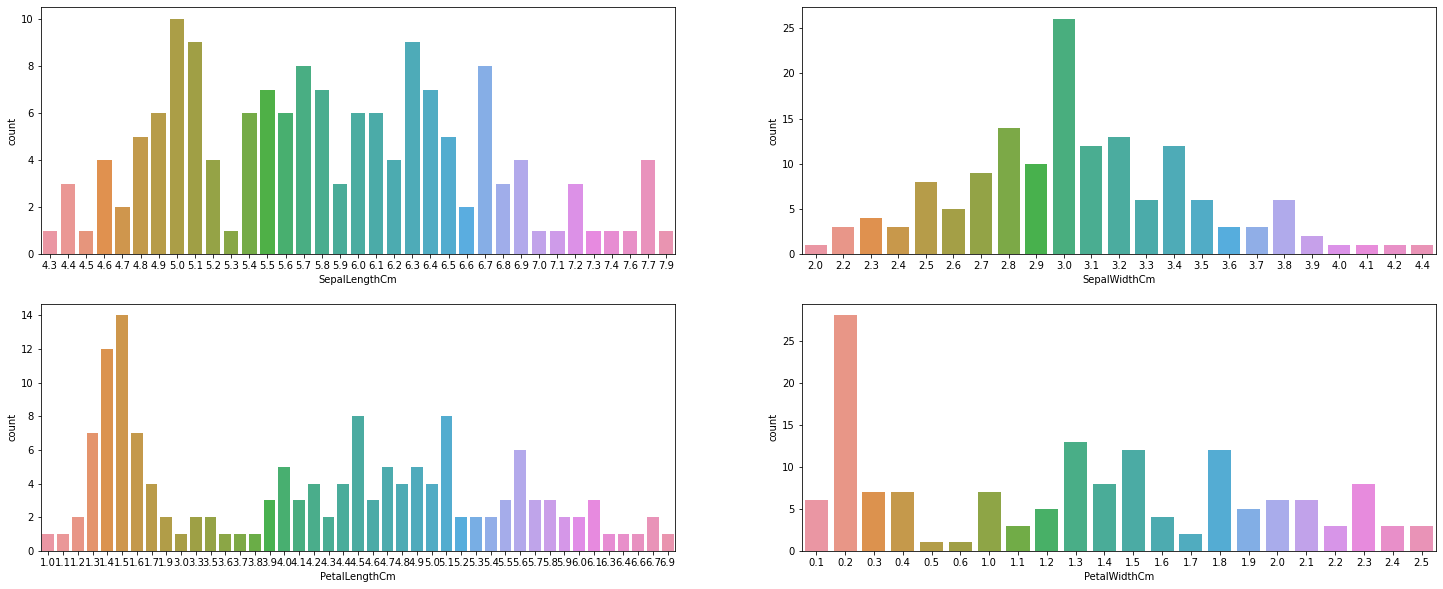

In [28]:
import warnings
warnings.filterwarnings('ignore')

#Plotting numerical Values 
plt.figure(figsize=(25,10))
plt.subplot(221);sns.countplot('SepalLengthCm',data=df);       plt.subplot(222);sns.countplot('SepalWidthCm',data=df);
plt.subplot(223);sns.countplot('PetalLengthCm',data=df);       plt.subplot(224);sns.countplot('PetalWidthCm',data=df);
plt.show()

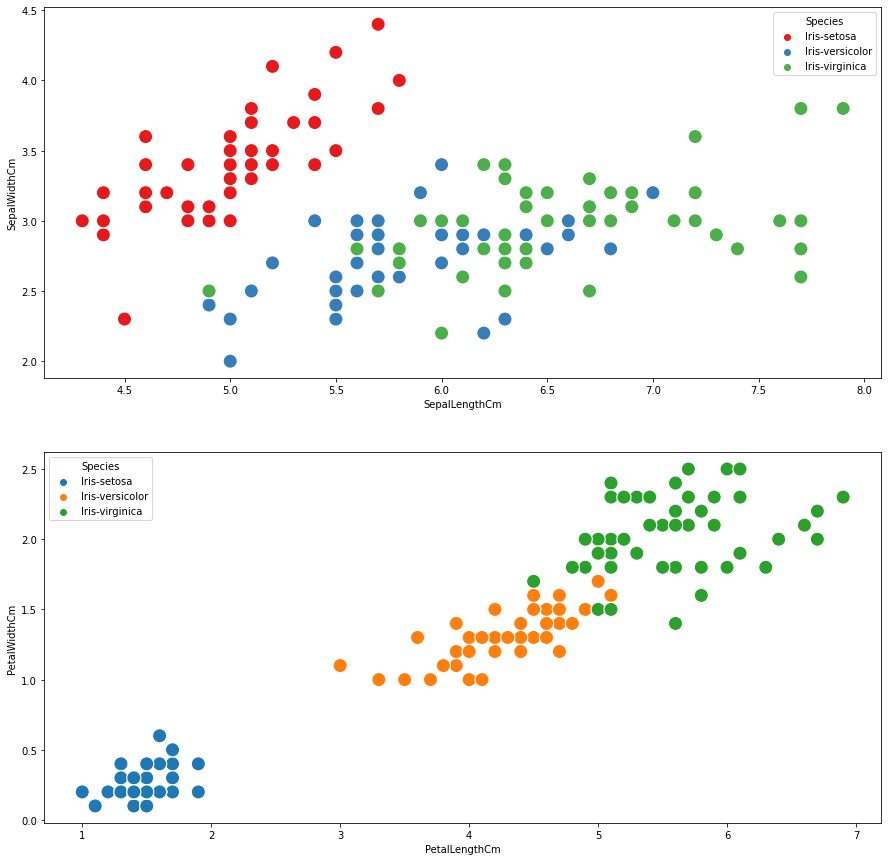

In [53]:
#camparing with dependent variable
plt.figure(figsize=(15,15))
plt.subplot(211);sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df,palette='Set1',marker='o',s=200);
plt.subplot(212);sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df,marker='o',s=200);
plt.show()

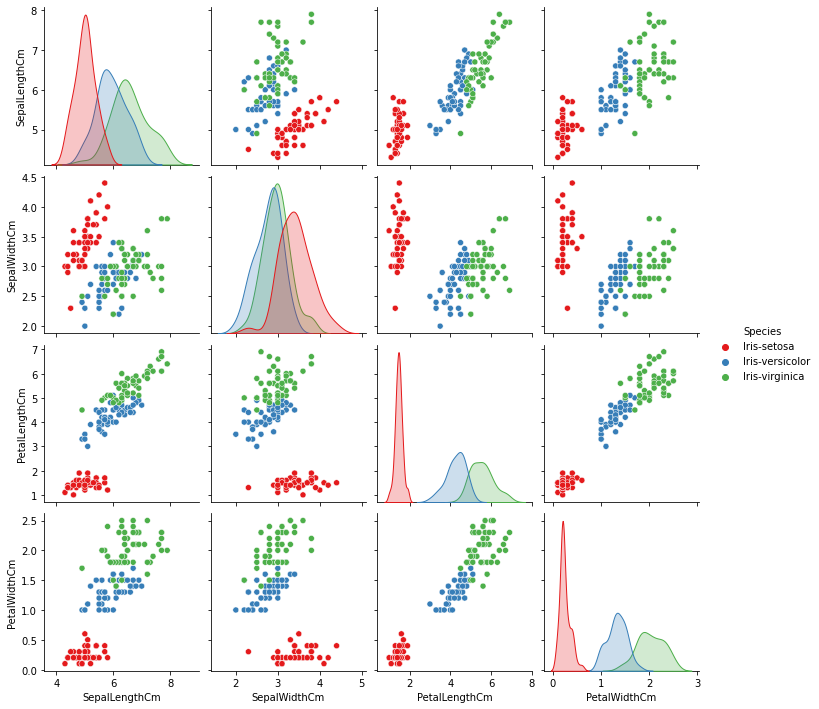

In [55]:
sns.pairplot(df,hue='Species',palette='Set1')

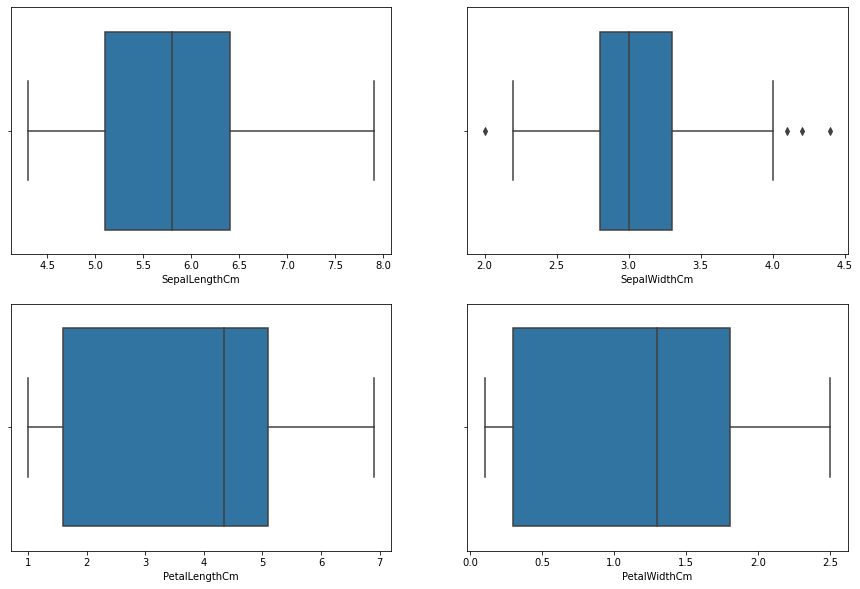

In [59]:
#Chekcing outliers
plt.figure(figsize=(15,10))
plt.subplot(221);sns.boxplot('SepalLengthCm',data=df);      plt.subplot(222);sns.boxplot('SepalWidthCm',data=df);
plt.subplot(223);sns.boxplot('PetalLengthCm',data=df);      plt.subplot(224);sns.boxplot('PetalWidthCm',data=df);
plt.show()

### Inference:--'SepalWidthCm' has outliers and will takecare of it as we go along.

# Data Preprocessing

In [60]:
# Converting catrgorivcal data into binary formate USing labelEncoder

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Species']=pd.DataFrame(lb.fit_transform(df['Species']))

In [61]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='Species', ylabel='count'>

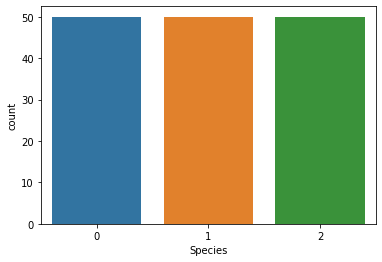

In [62]:
#chekcing the data is balace or not
sns.countplot('Species',data=df)

### Inference:= Dependent variable is Balanced

In [65]:
# Spliting Data & Creating X & Y Variable for model building

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

# Model Building

In [138]:
# Creating Train and test data using Model selection method
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)


In [139]:
#checking the size of train and test
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Building Decision Tree Classifier (CART) using Gini Criteria

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_train)

In [141]:
print('Training DataSet Accuracy',accuracy_score(y_train,y_pred))

Training DataSet Accuracy 1.0


In [142]:
print('Valication Mean F1 Score',cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print('Valication Mean Accuracy',cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Valication Mean F1 Score 0.9667878595432775
Valication Mean Accuracy 0.9416666666666668


[Text(125.55000000000001, 190.26, 'X[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(167.4, 135.9, 'X[3] <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(83.7, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(251.10000000000002, 81.53999999999999, 'X[2] <= 4.85\ngini = 0.048\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(209.25, 27.180000000000007, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]')]

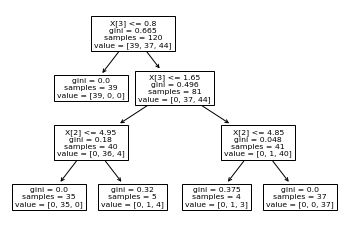

In [143]:
#unsing Hyperparameter to handle overfitting
from sklearn import tree
tree_clf=tree.DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train,y_train)
tree.plot_tree(tree_clf)

In [144]:
# Using confusion matrix 

from sklearn.metrics import confusion_matrix,classification_report
tree_clf=DecisionTreeClassifier(max_depth=4,min_samples_leaf=35)
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)
print('Test Accuracy:',accuracy_score(y_test,y_pred))


Test Accuracy: 0.9666666666666667


# Building Decision Tree Classifier using Entropy Criteria

In [146]:
x=df.iloc[:,0:4]
Y=df['Species']

In [147]:
df['Species'].unique()

array([0, 1, 2])

In [148]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,Y, test_size=0.2,random_state=40)

In [149]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [152]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [153]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [154]:
# Accuracy 
np.mean(preds==y_test)

0.9666666666666667

# Decision Tree Regression 

In [163]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [164]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [166]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [167]:
#Find the accuracy
model.score(X_test,y_test)

0.880312762636571